In [41]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [42]:
load_dotenv()

True

In [43]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [44]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}") 

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [45]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [81]:
today = pd.Timestamp("2017-07-01", tz="America/New_York").isoformat()

In [82]:
marketcap = [596707000, 552774000, 1444000000, 7596000000, 2113000000, 872504000, 2781000000, 2695000000, 260639000, 20155000, 841917000]
total_marketcap = [19773696000]
tickers = ["ACB", "AMRS", "APHA", "CGC", "CRON", "GRWG", "GWPH", "IIPR", "OGI", "SNDL", "TLRY"]
ACB_mc = [marketcap[0]/total_marketcap[0]]
AMRS_mc = [marketcap[1]/total_marketcap[0]]
APHA_mc = [marketcap[2]/total_marketcap[0]]
CGC_mc = [marketcap[3]/total_marketcap[0]]
CRON_mc = [marketcap[4]/total_marketcap[0]]
GRWG_mc = [marketcap[5]/total_marketcap[0]]
GWPH_mc = [marketcap[6]/total_marketcap[0]]
IIPR_mc = [marketcap[7]/total_marketcap[0]]
OGI_mc = [marketcap[8]/total_marketcap[0]]
SNDL_mc = [marketcap[9]/total_marketcap[0]]
TLRY_mc = [marketcap[10]/total_marketcap[0]]

print(f"Market weight of ACB is {ACB_mc}")
print(f"Market weight of AMRS is {AMRS_mc}")
print(f"Market weight of APHA is {APHA_mc}")
print(f"Market weight of CGC is {CGC_mc}")
print(f"Market weight of CRON is {CRON_mc}")
print(f"Market weight of GRWG is {GRWG_mc}")
print(f"Market weight of GWPH is {GWPH_mc}")
print(f"Market weight of IIPR is {IIPR_mc}")
print(f"Market weight of OGI is {OGI_mc}")
print(f"Market weight of SNDL is {SNDL_mc}")
print(f"Market weight of TLRY is {TLRY_mc}")

Market weight of ACB is [0.03017680660206367]
Market weight of AMRS is [0.02795501660387618]
Market weight of APHA is [0.07302630727204464]
Market weight of CGC is [0.38414669670252843]
Market weight of CRON is [0.10685913245556117]
Market weight of GRWG is [0.04412447728537953]
Market weight of GWPH is [0.14064138540412474]
Market weight of IIPR is [0.13629217319817197]
Market weight of OGI is [0.013181096745899198]
Market weight of SNDL is [0.0010192833954764957]
Market weight of TLRY is [0.04257762433487396]


In [83]:
timeframe = "1D"

In [84]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
 
).df

df_portfolio
df_portfolio.columns = ['ACB open', 'ACB high', 'ACB low', 'ACB close', 'ACB volume', 'AMRS open', 'AMRS high', 'AMRS low', 'AMRS close', 'AMRS volume', 'APHA open', 'APHA high', 'APHA low', 'APHA close', 'APHA volume', 'CGC open', 'CGC high', 'CGC low', 'CGC close', 'CGC volume', 'CRON open', 'CRON high', 'CRON low', 'CRON close', 'CRON volume', 'GRWG open', 'GRWG high', 'GRWG low', 'GRWG close', 'GRWG volume', 'GWPH open', 'GWPH high', 'GWPH low', 'GWPH close', 'GWPH volume', 'IIPR open', 'IIPR high', 'IIPR low', 'IIPR close', 'IIPR volume', 'OGI open','OGI high', 'OGI low', 'OGI close', 'OGI volume', 'SNDL open', 'SNDL high', 'SNDL low', 'SNDL close', 'SNDL volume', 'TLRY open', 'TLRY high', 'TLRY low', 'TLRY close', 'TLRY volume']

df_closing_prices = df_portfolio[['ACB close', 'AMRS close', 'APHA close', 'CGC close', 'CRON close', 'GRWG close', 'GWPH close', 'IIPR close', 'OGI close', 'SNDL close', 'TLRY close']]
df_closing_prices['Index'] = ''

df_closing_prices["Index"] = (ACB_mc * df_portfolio['ACB close']) + (AMRS_mc * df_portfolio['AMRS close'] + (APHA_mc * df_portfolio['APHA close']) + (CGC_mc * df_portfolio['CGC close']) + (CRON_mc * df_portfolio['CRON close']) + (GRWG_mc * df_portfolio['GRWG close']) + (GWPH_mc * df_portfolio['GWPH close']) * (IIPR_mc * df_portfolio['IIPR close']) + (OGI_mc * df_portfolio['OGI close']) +  (SNDL_mc * df_portfolio['SNDL close']) + (TLRY_mc * df_portfolio['TLRY close']))

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,ACB close,AMRS close,APHA close,CGC close,CRON close,GRWG close,GWPH close,IIPR close,OGI close,SNDL close,TLRY close,Index
2017-07-03,NaN,3.2600,4.1600,NaN,NaN,1.9100,100.84,16.62,NaN,NaN,NaN,NaN
2017-07-05,NaN,3.2400,4.1500,NaN,NaN,1.9200,103.31,16.83,NaN,NaN,NaN,NaN
2017-07-06,NaN,3.2000,4.0868,NaN,NaN,1.9900,100.26,16.52,NaN,NaN,NaN,NaN
2017-07-07,NaN,3.3178,4.0169,NaN,NaN,1.9040,102.06,16.60,NaN,NaN,NaN,NaN
2017-07-10,NaN,3.3600,4.0407,NaN,NaN,1.9400,100.14,16.44,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,3.840,2.6900,4.4369,18.34,5.48,16.5000,88.67,121.37,1.1850,0.1609,5.6500,215.417448
2020-10-29,4.090,2.6500,4.4900,18.78,5.57,17.1800,89.26,119.93,1.2200,0.1576,5.9600,214.558877
2020-10-30,4.050,2.4900,4.4950,18.78,5.29,16.7100,89.91,116.63,1.1933,0.1445,5.7100,210.298853
2020-11-02,4.725,2.6000,5.0300,20.93,6.01,18.5000,89.43,122.36,1.3100,0.1646,6.6489,220.134146


In [85]:
df_index = df_closing_prices[['Index']]
df_index

,Index
2017-07-03,NaN
2017-07-05,NaN
2017-07-06,NaN
2017-07-07,NaN
2017-07-10,NaN
...,...
2020-10-28,215.417448
2020-10-29,214.558877
2020-10-30,210.298853
2020-11-02,220.134146


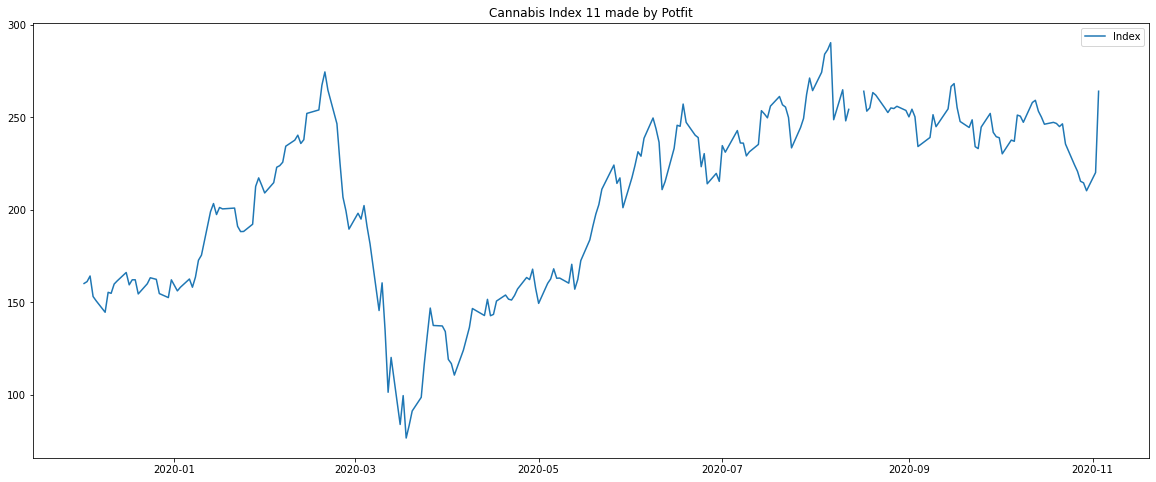

In [89]:
df_index.plot(title="Cannabis Index 11 made by Potfit", figsize=(20,8))

In [93]:
marketcap2 = [552774000, 1444000000, 872504000, 2781000000, 2695000000]
total_marketcap2 = [552774000 + 1444000000 + 872504000 + 2781000000 + 2695000000]
tickers2 = ["AMRS", "APHA", "GRWG", "GWPH", "IIPR"]


AMRS_mc2 = [marketcap2[0]/total_marketcap2[0]]
APHA_mc2 = [marketcap2[1]/total_marketcap2[0]]
GRWG_mc2 = [marketcap2[2]/total_marketcap2[0]]
GWPH_mc2 = [marketcap2[3]/total_marketcap2[0]]
IIPR_mc2 = [marketcap2[4]/total_marketcap2[0]]

print(f"Market weight of AMRS is {AMRS_mc2}")
print(f"Market weight of APHA is {APHA_mc2}")
print(f"Market weight of GRWG is {GRWG_mc2}")
print(f"Market weight of GWPH is {GWPH_mc2}")
print(f"Market weight of IIPR is {IIPR_mc2}")



Market weight of AMRS is [0.06623793719034884]
Market weight of APHA is [0.1730319828770234]
Market weight of GRWG is [0.10455062132142273]
Market weight of GWPH is [0.33324234375415657]
Market weight of IIPR is [0.3229371148570485]


In [94]:
df_portfolio2 = alpaca.get_barset(
    tickers2,
    timeframe,
    start = today,
 
).df

df_portfolio2
df_portfolio2.columns = ['AMRS open', 'AMRS high', 'AMRS low', 'AMRS close', 'AMRS volume', 'APHA open', 'APHA high', 'APHA low', 'APHA close', 'APHA volume', 'GRWG open', 'GRWG high', 'GRWG low', 'GRWG close', 'GRWG volume', 'GWPH open', 'GWPH high', 'GWPH low', 'GWPH close', 'GWPH volume', 'IIPR open', 'IIPR high', 'IIPR low', 'IIPR close', 'IIPR volume']

df_closing_prices2 = df_portfolio2[['AMRS close', 'APHA close', 'GRWG close', 'GWPH close', 'IIPR close']]
df_closing_prices2['Index'] = ''

df_closing_prices2["Index"] = (AMRS_mc * df_portfolio['AMRS close'] + (APHA_mc * df_portfolio['APHA close']) + (GRWG_mc * df_portfolio['GRWG close']) + (GWPH_mc * df_portfolio['GWPH close']) * (IIPR_mc * df_portfolio['IIPR close']))

df_closing_prices2.index = df_closing_prices2.index.date

df_closing_prices2

,AMRS close,APHA close,GRWG close,GWPH close,IIPR close,Index
2017-07-03,3.2600,4.1600,1.9100,100.84,16.62,69.151641
2017-07-05,3.2400,4.1500,1.9200,103.31,16.83,71.727206
2017-07-06,3.2000,4.0868,1.9900,100.26,16.52,68.346362
2017-07-07,3.3178,4.0169,1.9040,102.06,16.60,69.897494
2017-07-10,3.3600,4.0407,1.9400,100.14,16.44,67.936017
...,...,...,...,...,...,...
2020-10-28,2.6900,4.4369,16.5000,88.67,121.37,443.180741
2020-10-29,2.6500,4.4900,17.1800,89.26,119.93,440.893883
2020-10-30,2.4900,4.4950,16.7100,89.91,116.63,431.875338
2020-11-02,2.6000,5.0300,18.5000,89.43,122.36,450.761474


In [95]:
df_index2 = df_closing_prices2[['Index']]
df_index2

,Index
2017-07-03,69.151641
2017-07-05,71.727206
2017-07-06,68.346362
2017-07-07,69.897494
2017-07-10,67.936017
...,...
2020-10-28,443.180741
2020-10-29,440.893883
2020-10-30,431.875338
2020-11-02,450.761474


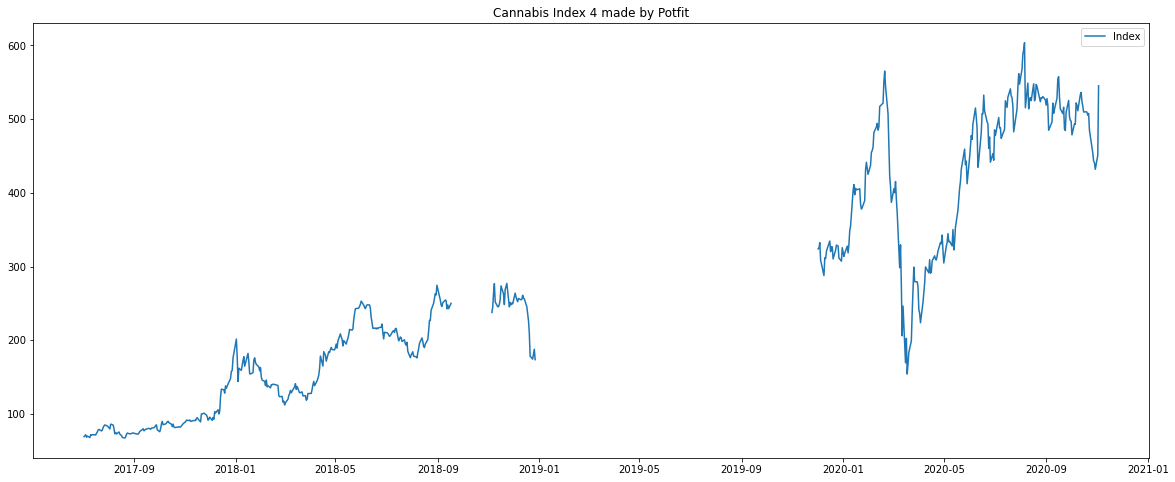

In [97]:
df_index2.plot(title="Cannabis Index 4 made by Potfit", figsize=(20,8))

In [87]:
df_daily_returns = df_closing_prices.pct_change()

df_daily_returns

,ACB close,AMRS close,APHA close,CGC close,CRON close,GRWG close,GWPH close,IIPR close,OGI close,SNDL close,TLRY close,Index
2017-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05,NaN,-0.006135,-0.002404,NaN,NaN,0.005236,0.024494,0.012635,NaN,NaN,NaN,NaN
2017-07-06,NaN,-0.012346,-0.015229,NaN,NaN,0.036458,-0.029523,-0.018419,NaN,NaN,NaN,NaN
2017-07-07,NaN,0.036812,-0.017104,NaN,NaN,-0.043216,0.017953,0.004843,NaN,NaN,NaN,NaN
2017-07-10,NaN,0.012719,0.005925,NaN,NaN,0.018908,-0.018812,-0.009639,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,-0.037594,-0.044405,-0.051944,-0.017149,-0.016158,-0.075112,-0.021518,-0.002794,-0.020661,-0.055197,0.011638,-0.024199
2020-10-29,0.065104,-0.014870,0.011968,0.023991,0.016423,0.041212,0.006654,-0.011865,0.029536,-0.020510,0.054867,-0.003986
2020-10-30,-0.009780,-0.060377,0.001114,0.000000,-0.050269,-0.027357,0.007282,-0.027516,-0.021885,-0.083122,-0.041946,-0.019855
2020-11-02,0.166667,0.044177,0.119021,0.114483,0.136106,0.107121,-0.005339,0.049130,0.097796,0.139100,0.164431,0.046768


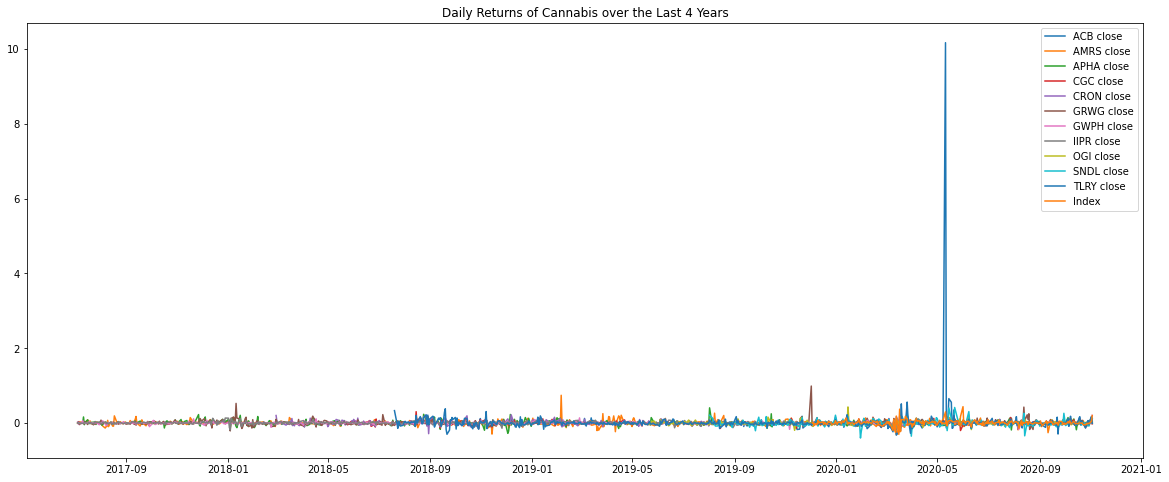

In [88]:
df_daily_returns.plot(title="Daily Returns of Cannabis over the Last 4 Years", figsize=(20,8))